<a href="https://colab.research.google.com/github/LuisRCrtr/data_science_portfolio/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 


Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

The challenge is to design an algorithm that has the ability to make predictions about the potability of a water sample based on certain parameters.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook
from sklearn import tree

import warnings
warnings.filterwarnings('always')

# Exploring the dataset

In [ ]:
df = pd.read_csv("water_potability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.size

32760

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Visualization

In [ ]:
potability_prcnt = (df[df["Potability"]==1].shape[0])*100/df.shape[0]
print(f"The percentage of potable water samples in the dataset is {potability_prcnt:.{4}}%")
print(f"The percentage of non-potable water samples in the dataset is {100-(potability_prcnt):.{4}}%")



The percentage of potable water samples in the dataset is 39.01%
The percentage of non-potable water samples in the dataset is 60.99%


<AxesSubplot:xlabel='Potability', ylabel='count'>

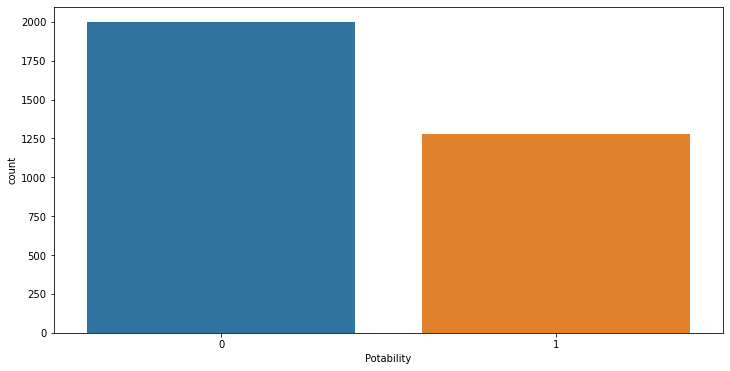

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=df)

# Histogram plot

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

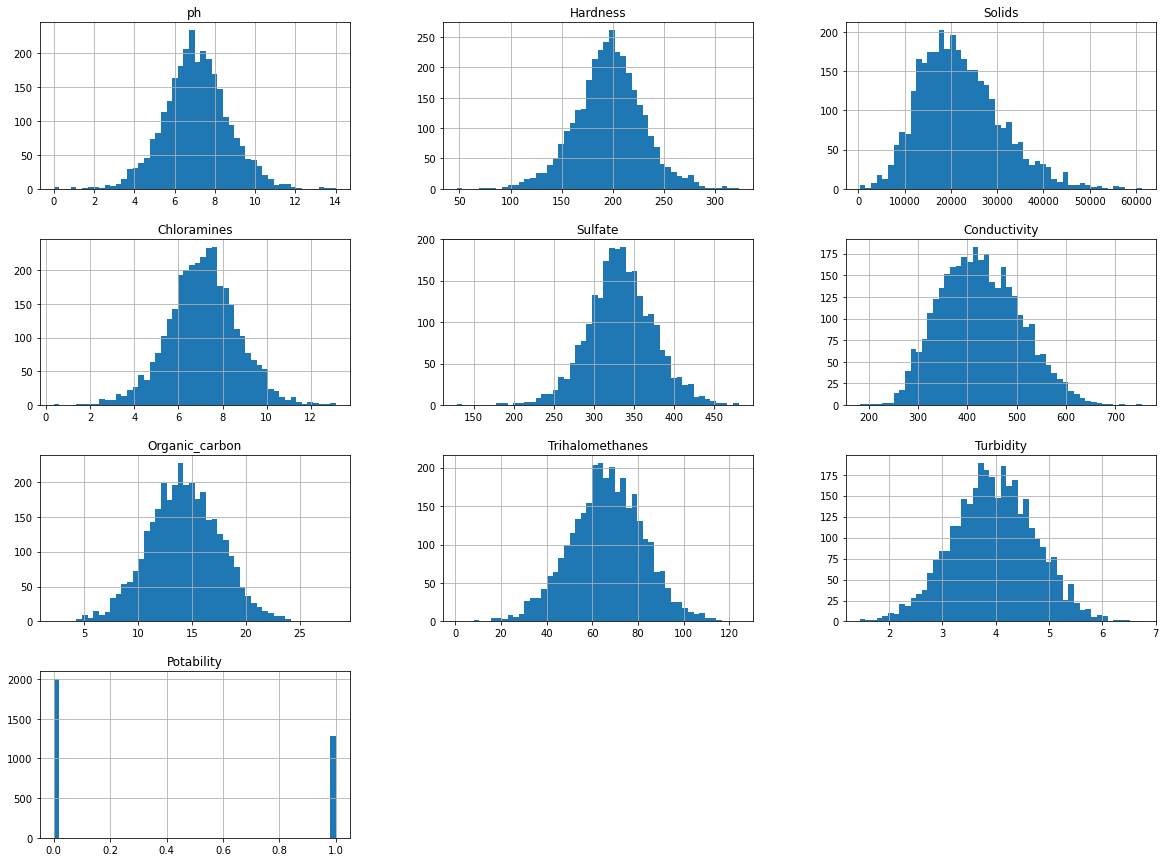

In [ ]:
df.hist(bins=50, figsize=(20,15))

# Create a test set

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(f'Lenght of train_set: {len(train_set)}'); print(f'Lenght of test_set: {len(test_set)}')

Lenght of train_set: 2620
Lenght of test_set: 656


In [ ]:
cols = list(train_set.columns)
cols.remove('Potability')
cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

# Some Barplots

In [ ]:
water = train_set.copy()

C:\Users\PC\AppData\Local\Temp/ipykernel_12080/991568403.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):


Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

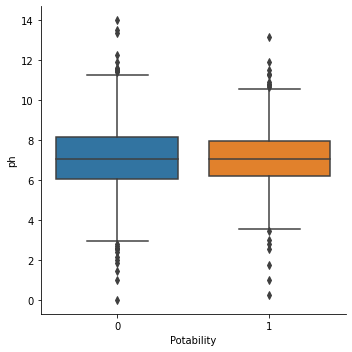

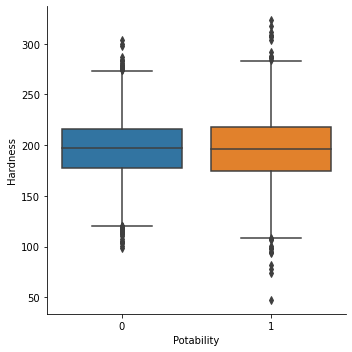

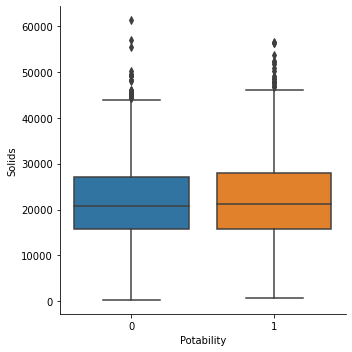

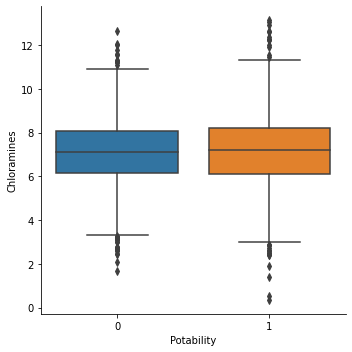

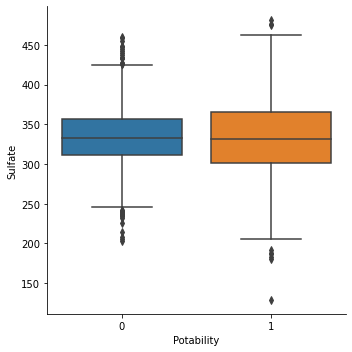

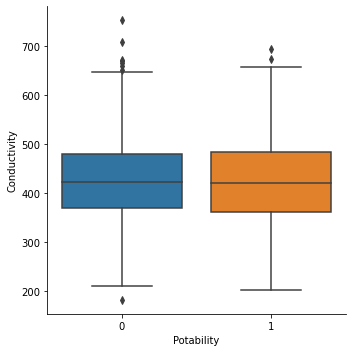

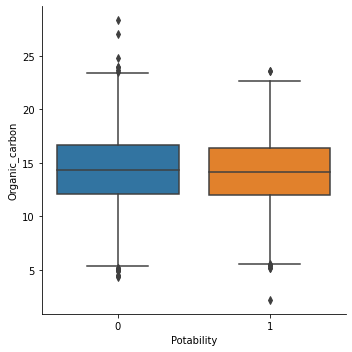

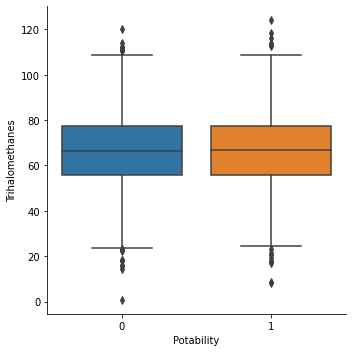

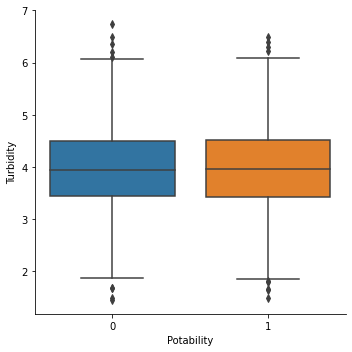

In [ ]:
def box_plotter(water, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=df, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    box_plotter(water, column)

# Pairplots

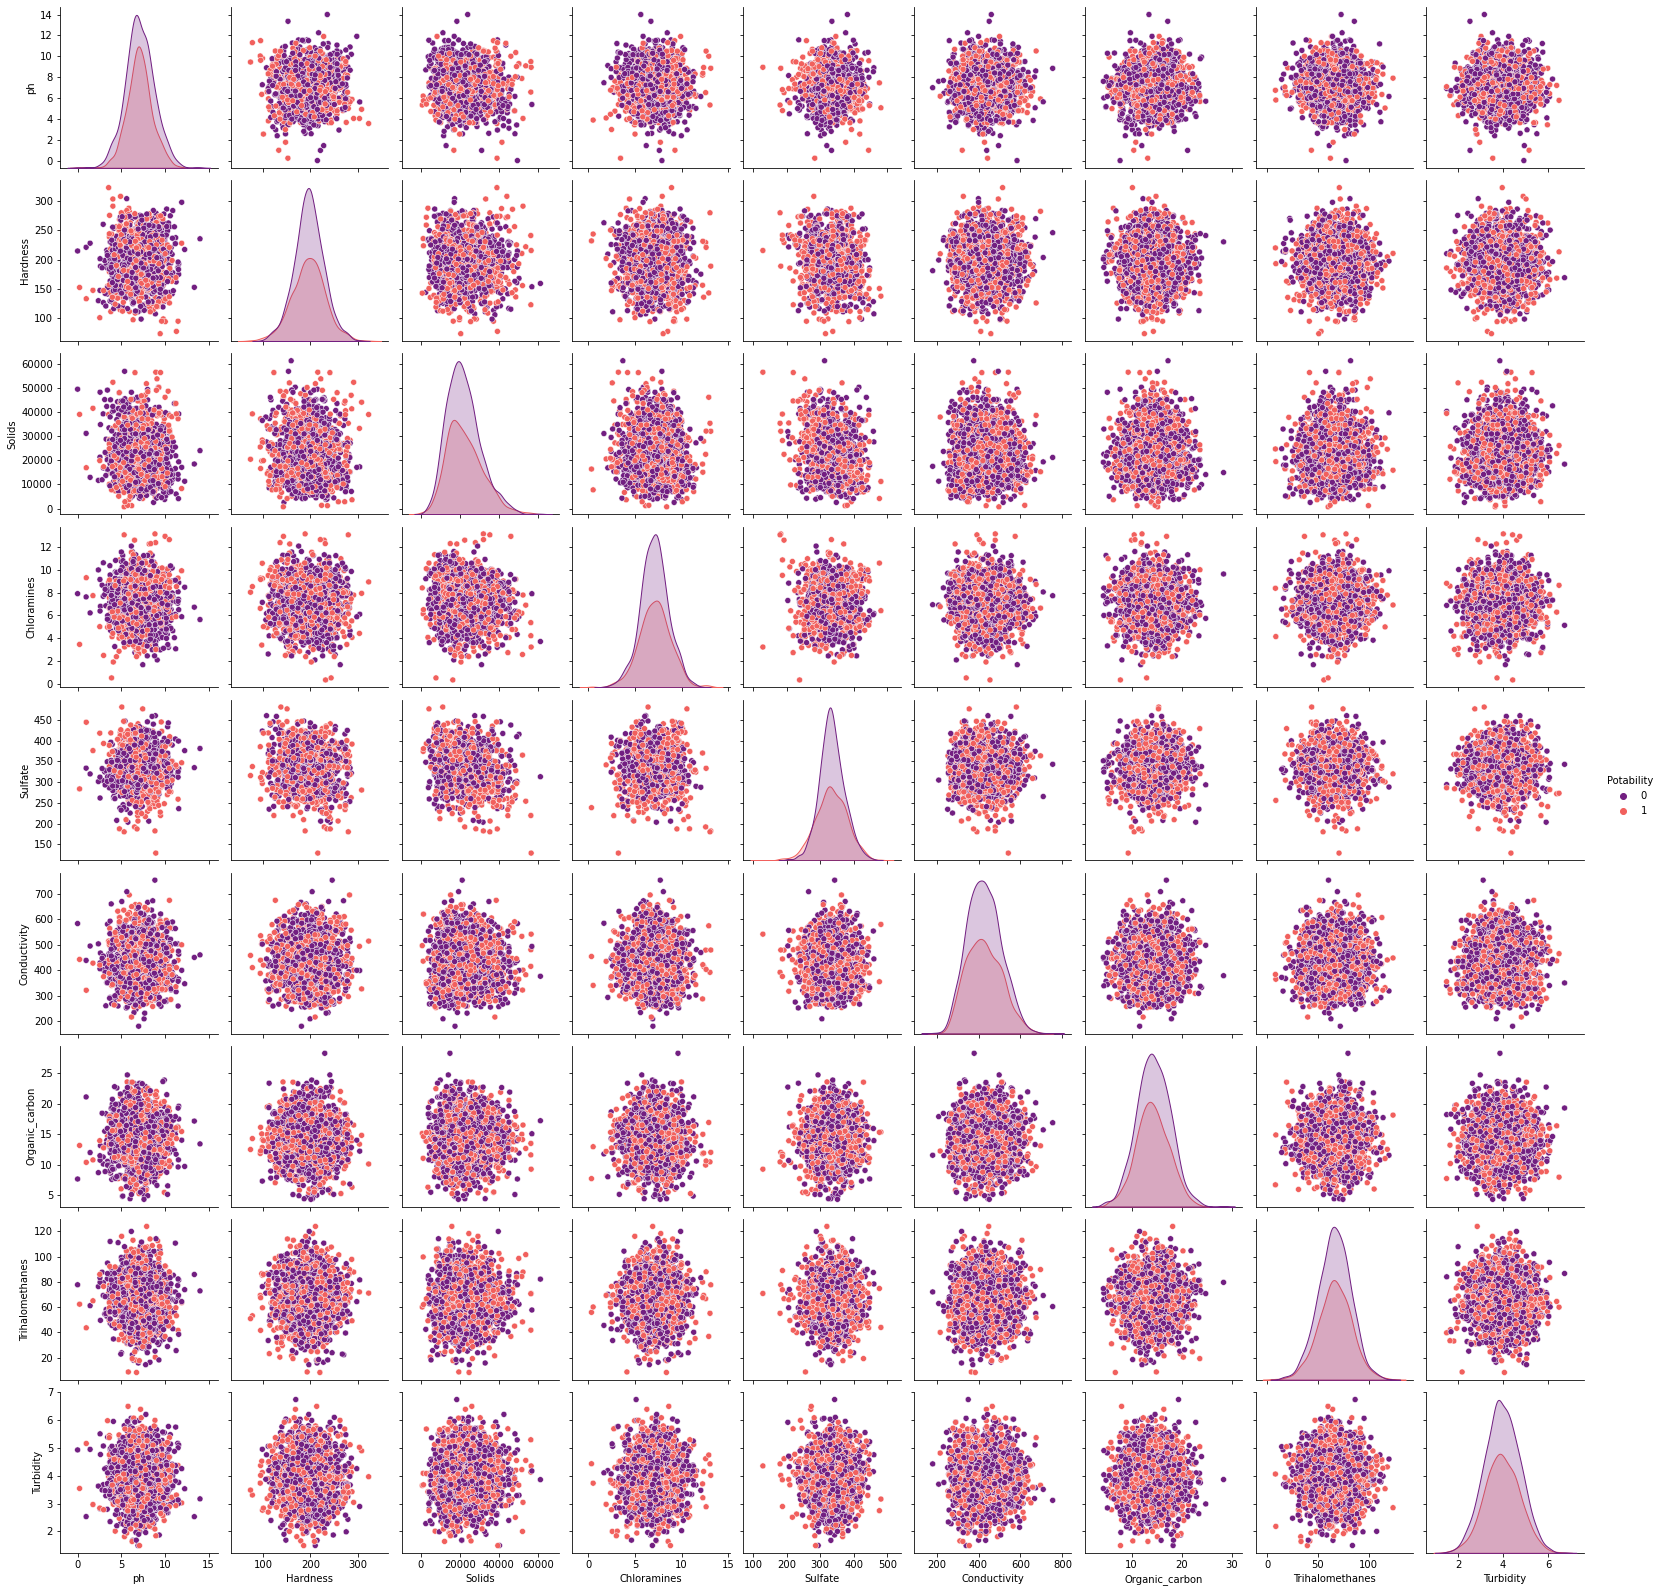

In [ ]:
sns.pairplot(water, hue="Potability", palette="magma");

# Looking for correlations


In [ ]:
corr_matrix = water.corr()

In [ ]:
corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.038527
Chloramines        0.015316
Trihalomethanes    0.013292
Conductivity      -0.002563
Turbidity         -0.004221
ph                -0.012945
Hardness          -0.016987
Sulfate           -0.021479
Organic_carbon    -0.027225
Name: Potability, dtype: float64

<AxesSubplot:>

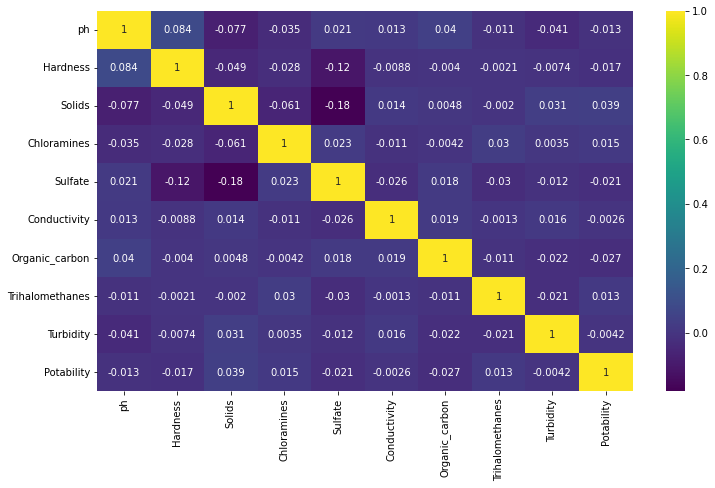

In [ ]:
# Scatter Matrix
plt.figure(figsize=(12,7))
sns.heatmap(water.corr(),annot=True,cmap='viridis')

# Data Cleaning

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We can see that there are many missing values in the dataset, so I'll try to deal with it

In [ ]:
water_labels = train_set["Potability"].copy()
water_pred = train_set.drop("Potability", axis=1)


In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(water_pred)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([7.02161748e+00, 1.96901673e+02, 2.09212030e+04, 7.10711689e+00,
       3.32759029e+02, 4.22033283e+02, 1.41555981e+01, 6.66210265e+01,
       3.94067809e+00])

In [ ]:
X = imputer.transform(water_pred)

In [ ]:
df_train = pd.DataFrame(X, columns=water_pred.columns,
                       index=water_pred.index)

In [ ]:
df_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

# Feature Scaling

The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and makes it easier to process by most ML algorithms.

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.

Scikit-Learn provides a transformer called StandardScaler for standarization

# Transformation Pipelines

In [ ]:
water_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

In [ ]:
water_training = water_pipeline.fit_transform(df_train)

# Select and training a model

In [ ]:
x_test = test_set.drop("Potability", axis=1)
y_test = test_set["Potability"].copy()

In [ ]:
# create the model
RmTree = RandomForestClassifier(n_estimators =100,min_samples_leaf =2, random_state = 42)
# model training
RmTree.fit(water_training, water_labels)

# prediction
x_test_prepared = water_pipeline.fit_transform(x_test)
RmTree_pred = RmTree.predict(x_test_prepared)
# accuracy
RmTree_acc = accuracy_score(y_test, RmTree_pred)

print("The accuracy for Random Forest is", RmTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RmTree_pred))

The accuracy for Random Forest is 0.6692073170731707
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.60      0.34      0.43       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656



<AxesSubplot:>

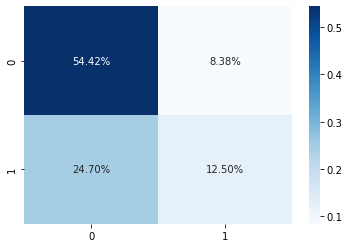

In [ ]:
# let's plot confusion matrix
RmTree_cm = confusion_matrix(y_test, RmTree_pred)
#RmTree_cm
sns.heatmap(RmTree_cm/np.sum(RmTree_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
# create the model
XGB = XGBClassifier(max_depth= 8, n_estimators= 250, random_state= 0,  learning_rate= 0.03, n_jobs=5)
# model training
XGB.fit(water_training, water_labels)
# prediction
XGB_pred = XGB.predict(x_test_prepared)
# accuracy
XGB_acc = accuracy_score(y_test, XGB_pred)

print("The accuracy for XGBoost is", XGB_acc)
print("The classification report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.6935975609756098
The classification report using XGBoost is: 0.6935975609756098
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       412
           1       0.64      0.41      0.50       244

    accuracy                           0.69       656
   macro avg       0.67      0.64      0.64       656
weighted avg       0.68      0.69      0.68       656



<AxesSubplot:>

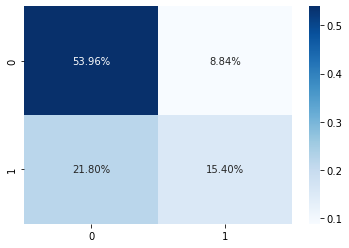

In [ ]:
# let's plot confusion matrix
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create the model
KNN = KNeighborsClassifier(n_neighbors = 8, leaf_size =20)
# model training
KNN.fit(water_training, water_labels)
# prediction
KNN_pred = KNN.predict(x_test_prepared)
# accuracy
KNN_acc = accuracy_score(y_test, KNN_pred)

In [ ]:
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.649390243902439
The classification report using KNeighbors is: 0.649390243902439
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       412
           1       0.56      0.27      0.36       244

    accuracy                           0.65       656
   macro avg       0.61      0.57      0.56       656
weighted avg       0.63      0.65      0.61       656



<AxesSubplot:>

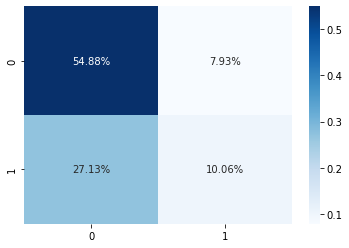

In [ ]:
# let's plot confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
# create the model
SVM = SVC(kernel ='rbf', random_state = 42)
# model training
SVM.fit(water_training, water_labels)
# prediction
SVM_pred = SVM.predict(x_test_prepared)
# accuracy
SVM_acc = accuracy_score(y_test, SVM_pred)

In [ ]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6905487804878049
The classification report using SVM is: 0.6905487804878049
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       412
           1       0.68      0.32      0.43       244

    accuracy                           0.69       656
   macro avg       0.69      0.61      0.61       656
weighted avg       0.69      0.69      0.66       656



<AxesSubplot:>

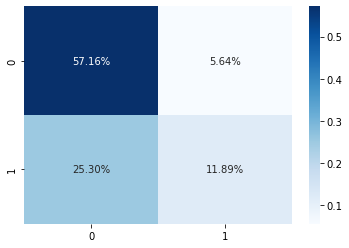

In [ ]:
# let's plot confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
models = pd.DataFrame({
    'Model':['Random Forest', 'XGBoost', 'KNeighbours', 'SVM'],
    'Accuracy' :[RmTree_acc, XGB_acc, KNN_acc, SVM_acc]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,XGBoost,0.693598
3,SVM,0.690549
0,Random Forest,0.669207
2,KNeighbours,0.649390


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

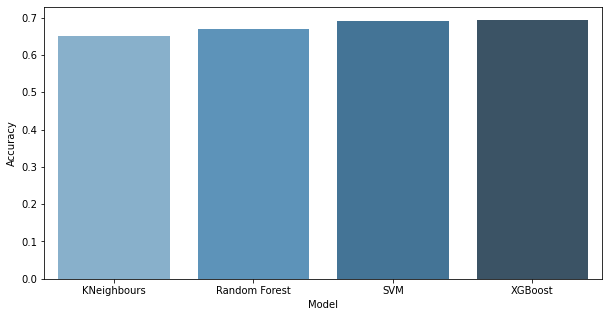

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data = models, 
            order = models.sort_values("Accuracy").Model,
           palette = 'Blues_d')

# Conclusions


*   The correlation coefficients between the features were very low.
*   XGBoost worked the best to train the model.

